In [1]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  

In [2]:
plastic=pd.read_csv("E:/Ravi_ExcelR_Assignments/Forecasting/PlasticSales.csv",header=0, index_col=0, parse_dates=True)
plastic

,Sales
Month,
2049-01-01,742
2049-02-01,697
2049-03-01,776
2049-04-01,898
2049-05-01,1030
2049-06-01,1107
2049-07-01,1165
2049-08-01,1216
2049-09-01,1208


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6C50BB700>]],
      dtype=object)

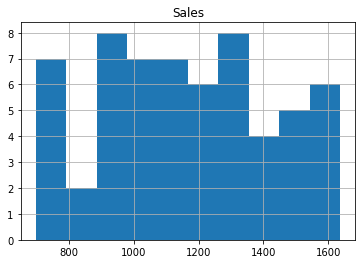

In [3]:
plastic.hist() 

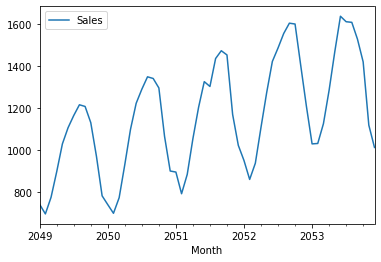

In [4]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
plastic.plot()
pyplot.show()  

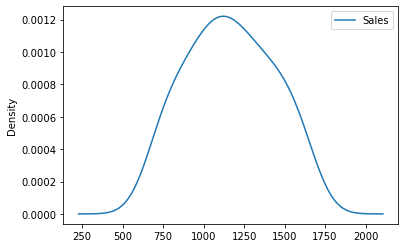

In [5]:
plastic.plot(kind='kde')  

In [6]:
# separate out a validation dataset
split_point = len(plastic) - 10
dataset, validation = plastic[0:split_point], plastic[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False) 

Dataset 50, Validation 10


In [7]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:] 

In [8]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse) 

>Predicted=896.000, Expected=793.000
>Predicted=793.000, Expected=885.000
>Predicted=885.000, Expected=1055.000
>Predicted=1055.000, Expected=1204.000
>Predicted=1204.000, Expected=1326.000
>Predicted=1326.000, Expected=1303.000
>Predicted=1303.000, Expected=1436.000
>Predicted=1436.000, Expected=1473.000
>Predicted=1473.000, Expected=1453.000
>Predicted=1453.000, Expected=1170.000
>Predicted=1170.000, Expected=1023.000
>Predicted=1023.000, Expected=951.000
>Predicted=951.000, Expected=861.000
>Predicted=861.000, Expected=938.000
>Predicted=938.000, Expected=1109.000
>Predicted=1109.000, Expected=1274.000
>Predicted=1274.000, Expected=1422.000
>Predicted=1422.000, Expected=1486.000
>Predicted=1486.000, Expected=1555.000
>Predicted=1555.000, Expected=1604.000
>Predicted=1604.000, Expected=1600.000
>Predicted=1600.000, Expected=1403.000
>Predicted=1403.000, Expected=1209.000
>Predicted=1209.000, Expected=1030.000
>Predicted=1030.000, Expected=1032.000
RMSE: 130.244


In [9]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [10]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse 

In [11]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))  

In [13]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values) 

ARIMA(0, 0, 0) RMSE=287.826
ARIMA(0, 0, 1) RMSE=173.350
ARIMA(0, 1, 0) RMSE=131.965
ARIMA(0, 1, 1) RMSE=115.456
ARIMA(1, 0, 0) RMSE=131.068
ARIMA(1, 0, 1) RMSE=113.285
ARIMA(1, 1, 0) RMSE=104.850
Best ARIMA(1, 1, 0) RMSE=104.850


In [14]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [15]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32') 

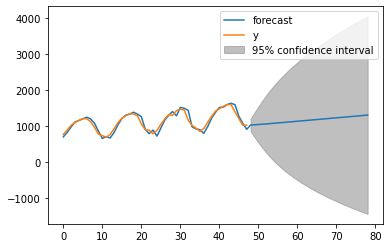

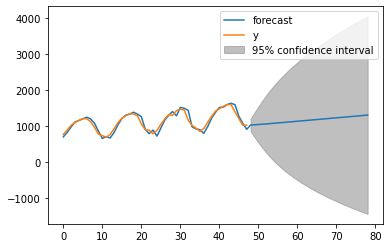

In [16]:
# fit model
model = ARIMA(X, order=(1,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79) 

In [17]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse 

383.29312980720795

In [18]:
#Final model after combining train and test data

In [19]:
# fit model
data = pd.read_excel('E:/Ravi_ExcelR_Assignments/Forecasting/Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32') 

In [20]:
model = ARIMA(X, order=(1,1,0))
model_fit = model.fit() 

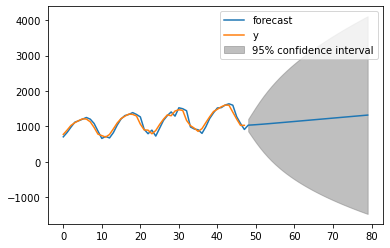

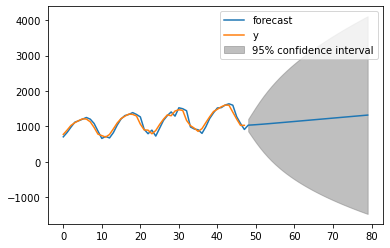

In [21]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80) 

In [22]:
forecast 

array([1036.54214525, 1042.76441369, 1050.09708837, 1058.16363899,
       1066.71521383, 1075.58734488, 1084.67133396, 1093.89534165,
       1103.21188868, 1112.58959569])